In [2]:
import autoencoderProject

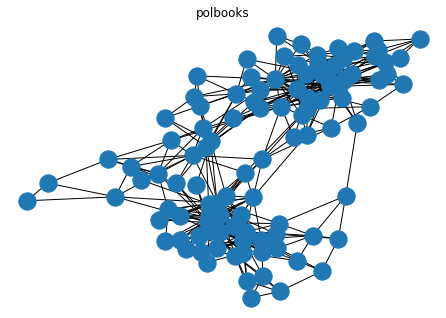

In [38]:
# Loading required datasets
datasets={
    '0':'karate',
    '1':'football',
    '2':'polbooks',
    '3':'dolphin',
    '4':'lfr 0.1',
    '5':'lfr 0.3',
    '6':'lfr 0.5',
}
choice = input("Enter your choice (0-6):")
G_data,B_data=autoencoderProject.load_dataset(datasets[choice])
autoencoderProject.drawDataset(G_data,datasets[choice])

In [39]:
hidden_layers={
    '0':[32,16],
    '1':[64,32],
    '2':[64,32],
    '3':[32,16],
    '4':[64,32,16],
    '5':[64,32,16],
    '6':[64,32]
}

epoch_per_layer={
    '0':[200,200],
    '1':[200,200,200],
    '2':[50,50],
    '3':[200,200],
    '4':[200,100,100],
    '5':[200,300,200],
    '6':[400,200]
}



epoch : 1/50, recon loss = 0.07607518
epoch : 2/50, recon loss = 0.07417147
epoch : 3/50, recon loss = 0.07244234
epoch : 4/50, recon loss = 0.07085234
epoch : 5/50, recon loss = 0.06936894
epoch : 6/50, recon loss = 0.06796364
epoch : 7/50, recon loss = 0.06661240
epoch : 8/50, recon loss = 0.06529593
epoch : 9/50, recon loss = 0.06399987
epoch : 10/50, recon loss = 0.06271475
epoch : 11/50, recon loss = 0.06143618
epoch : 12/50, recon loss = 0.06016518
epoch : 13/50, recon loss = 0.05890855
epoch : 14/50, recon loss = 0.05767892
epoch : 15/50, recon loss = 0.05649393
epoch : 16/50, recon loss = 0.05537383
epoch : 17/50, recon loss = 0.05433702
epoch : 18/50, recon loss = 0.05339438
epoch : 19/50, recon loss = 0.05254536
epoch : 20/50, recon loss = 0.05177824
epoch : 21/50, recon loss = 0.05107484
epoch : 22/50, recon loss = 0.05041675
epoch : 23/50, recon loss = 0.04978997
epoch : 24/50, recon loss = 0.04918642
epoch : 25/50, recon loss = 0.04860315
epoch : 26/50, recon loss = 0.0480

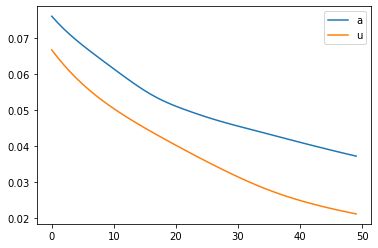

Index:0	Max NMI till now:0.41547416548499944
Index:7	Max NMI till now:0.4154741654849996
Index:105	Max NMI till now:0.4547447960387146
Index:105	Max NMI till now:0.4547447960387146
Index:105	Max NMI till now:0.4547447960387146
Index:105	Max NMI till now:0.4547447960387146
Index:105	Max NMI till now:0.4547447960387146
Index:105	Max NMI till now:0.4547447960387146
Index:105	Max NMI till now:0.4547447960387146
Index:105	Max NMI till now:0.4547447960387146
Index:105	Max NMI till now:0.4547447960387146
105


In [40]:
encoder=autoencoderProject.fit_dataset(B_data,hidden_layers=hidden_layers[choice],epoch_per_layer=epoch_per_layer[choice])
r_state=autoencoderProject.calcMaxState(G_data, B_data, datasets[choice], encoder)
print(r_state)

In [41]:
import matplotlib.pyplot as plt
import numpy as np

In [42]:
original_nmi=autoencoderProject.compute_results(G_data,B_data,datasets[choice],encoder,only_kmeans=True)
optimized_nmi=autoencoderProject.compute_results(G_data,B_data,datasets[choice],encoder,r_state=r_state)

NMI when applying only kmeans:0.4544
NMI on applying autoencoder:0.4547
Improvement upon kmeans:0.0%


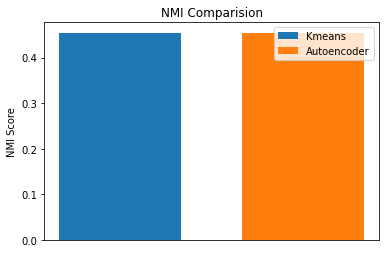

In [43]:
if((optimized_nmi-original_nmi)>0):
    print("NMI when applying only kmeans:{:.4f}".format(original_nmi))
    print("NMI on applying autoencoder:{:.4f}".format(optimized_nmi))
    print("Improvement upon kmeans:{:.1f}%".format((optimized_nmi-original_nmi)*100))
    fig, ax = plt.subplots()
    labels=['Kmeans','Autoencoder']
    x = np.arange(1)
    width=0.25
    rects1 = ax.bar(x + 0.0, original_nmi, width, label=labels[0])
    rects2 = ax.bar(x + 0.375, optimized_nmi, width, label=labels[1])
    ax.set_ylabel('NMI Score')
    ax.set_title('NMI Comparision')
    plt.xticks([])
    ax.legend()
    plt.show()
else:
    print("NMI on applying autoencoder:{:.4f}".format(optimized_nmi))

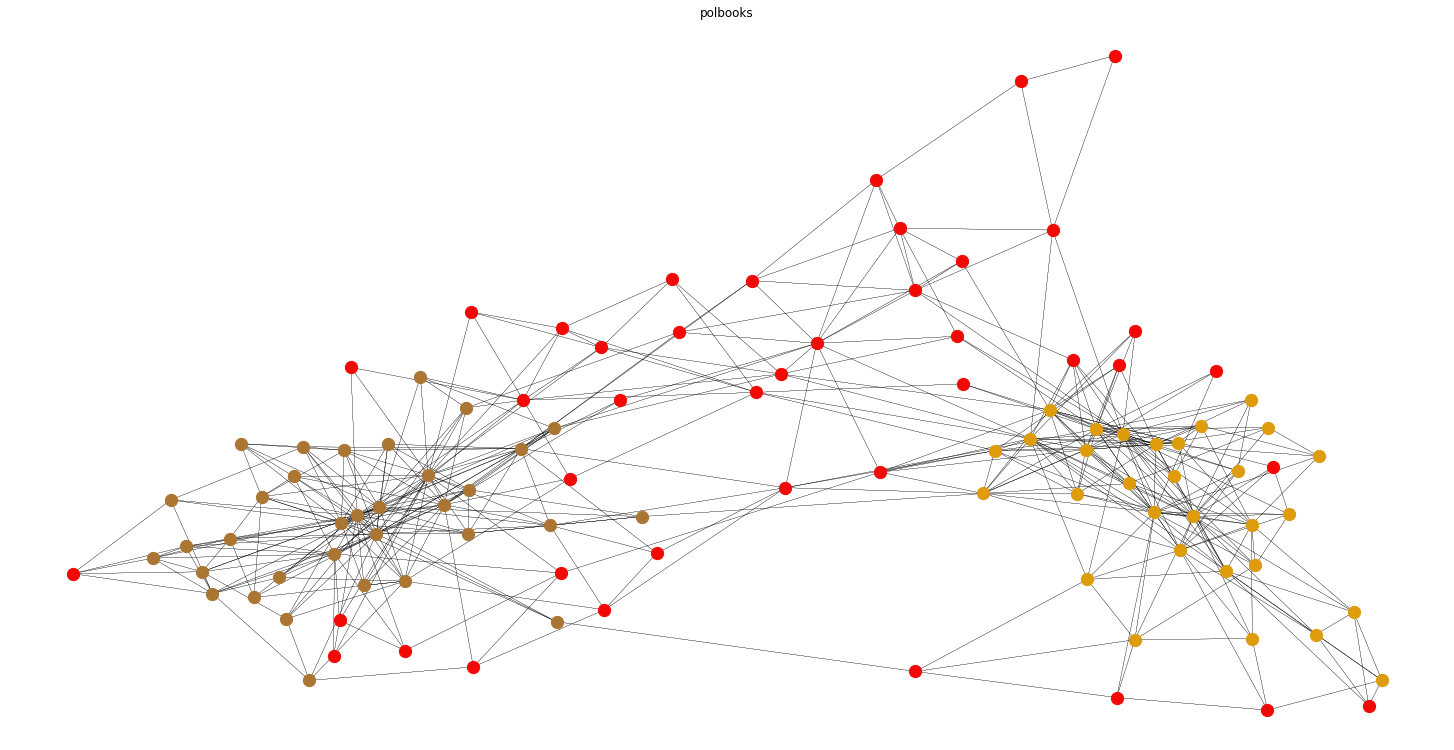

In [44]:
autoencoderProject.show_clustering(G_data,B_data,datasets[choice],encoder,r_state)